---
주식 종목 예측해 보기

---
루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.
평가문항	상세기준

1. 시계열의 안정성이 충분히 확인되었는가?
	플로팅과 adfuller 메소드가 모두 적절히 사용되었음

2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?
	p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨

3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?
	3개 이상 종목이 MAPE 10% 미만의 정확도로 예측됨

### lg 화학

---
### STEP 1 : 시계열 데이터 준비

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [18]:
# lg화학
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/051910.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head(3)

Date
2016-03-02    312000.0
2016-03-03    308000.0
2016-03-04    298000.0
Name: Close, dtype: float64

---
### STEP 2 : 각종 전처리 수행

In [19]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [20]:
# 로그 변환 시도 
ts_log = np.log(ts)

---
### STEP 3 : 시계열 안정성 분석

In [21]:
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [22]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                    0.236483
p-value                           0.974235
#Lags Used                        6.000000
Number of Observations Used    1219.000000
Critical Value (1%)              -3.435726
Critical Value (5%)              -2.863914
Critical Value (10%)             -2.568034
dtype: float64


In [23]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

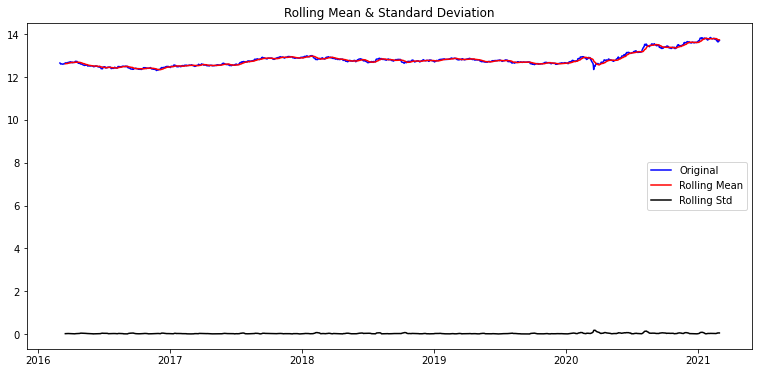

In [29]:
# 정성적 그래프 분석

rcParams['figure.figsize'] = 13, 6 
plot_rolling_statistics(ts_log, window=12)

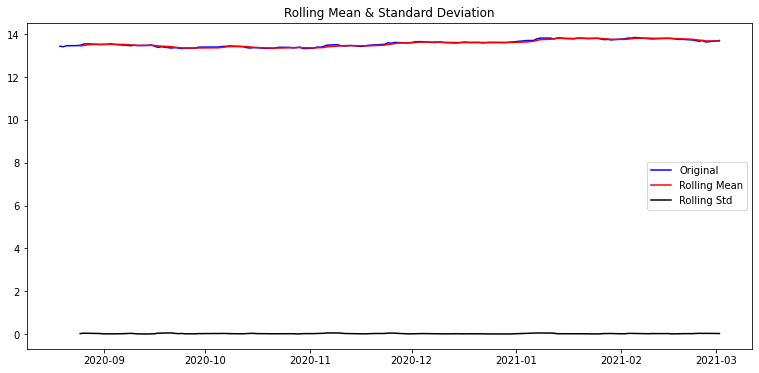

In [30]:
# 6개월 뽑아 보기
plot_rolling_statistics(ts_log[-130:], window=5)

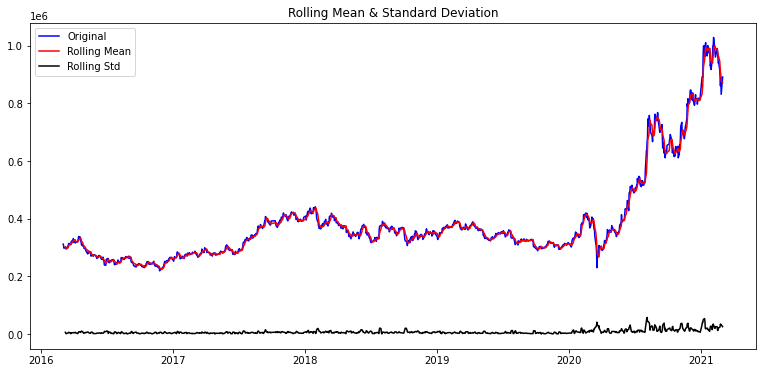

In [31]:
#전체
plot_rolling_statistics(ts, window=5)

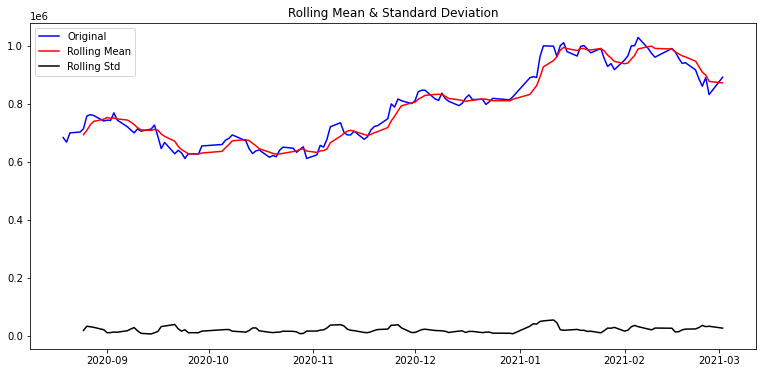

In [32]:
# 6개월 뽑아 보기
plot_rolling_statistics(ts[-130:], window=5)

In [33]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='additive', period = 25) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.079763e+01
p-value                        2.056073e-19
#Lags Used                     2.300000e+01
Number of Observations Used    1.178000e+03
Critical Value (1%)           -3.435913e+00
Critical Value (5%)           -2.863997e+00
Critical Value (10%)          -2.568078e+00
dtype: float64


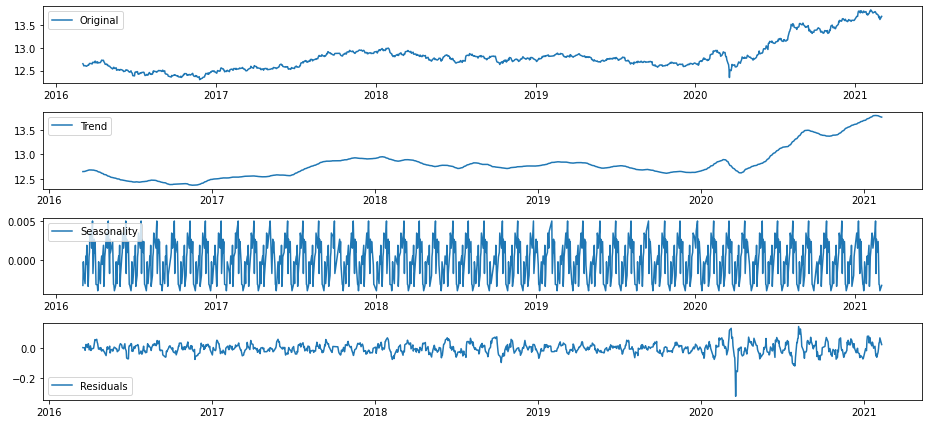

In [34]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [35]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='additive', period = 26) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.076718e+01
p-value                        2.435748e-19
#Lags Used                     2.300000e+01
Number of Observations Used    1.176000e+03
Critical Value (1%)           -3.435923e+00
Critical Value (5%)           -2.864001e+00
Critical Value (10%)          -2.568080e+00
dtype: float64


In [36]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='additive', period = 27) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.077860e+01
p-value                        2.285661e-19
#Lags Used                     2.300000e+01
Number of Observations Used    1.176000e+03
Critical Value (1%)           -3.435923e+00
Critical Value (5%)           -2.864001e+00
Critical Value (10%)          -2.568080e+00
dtype: float64


In [37]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='additive', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.083900e+01
p-value                        1.634083e-19
#Lags Used                     2.300000e+01
Number of Observations Used    1.172000e+03
Critical Value (1%)           -3.435942e+00
Critical Value (5%)           -2.864009e+00
Critical Value (10%)          -2.568085e+00
dtype: float64


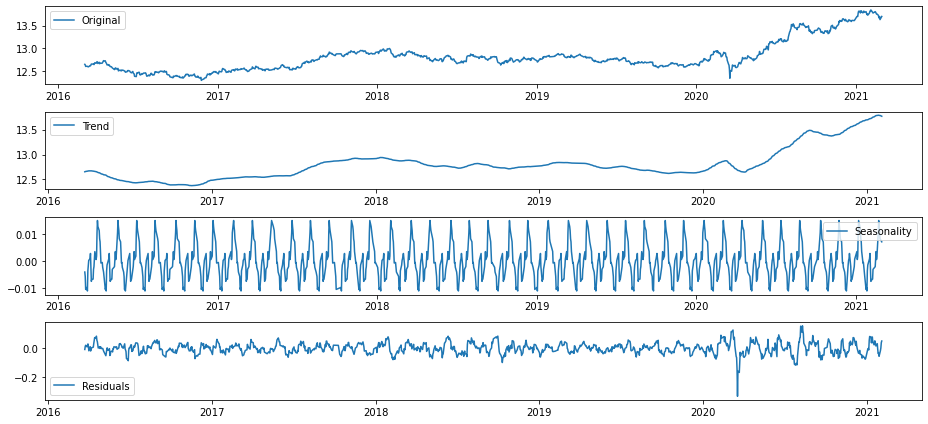

In [38]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

---
### STEP 4 : 학습, 테스트 데이터셋 생성

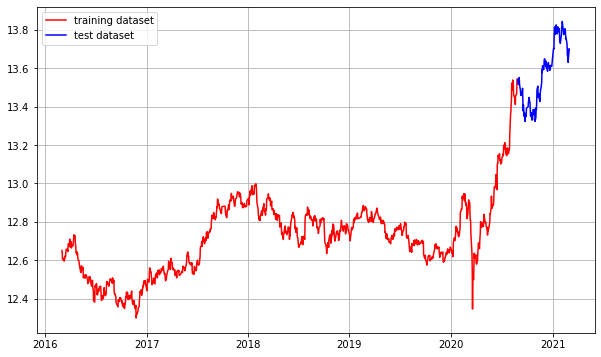

In [39]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

---
### STEP 5 : 적정 ARIMA 모수 찾기

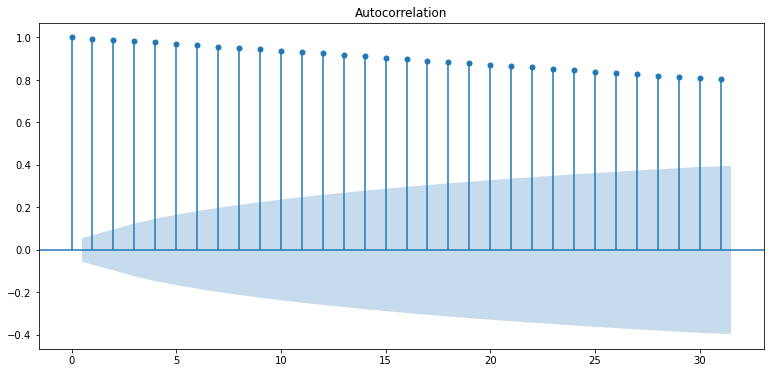

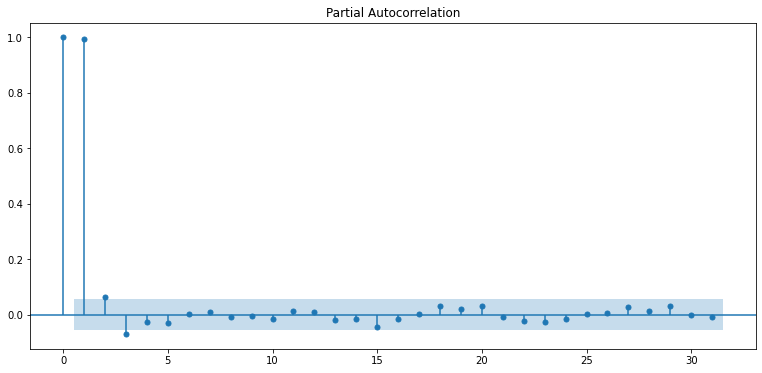

In [40]:
# ACF, PACF 그려보기 -> p,q  구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.504033e+01
p-value                        9.613865e-28
#Lags Used                     5.000000e+00
Number of Observations Used    1.219000e+03
Critical Value (1%)           -3.435726e+00
Critical Value (5%)           -2.863914e+00
Critical Value (10%)          -2.568034e+00
dtype: float64


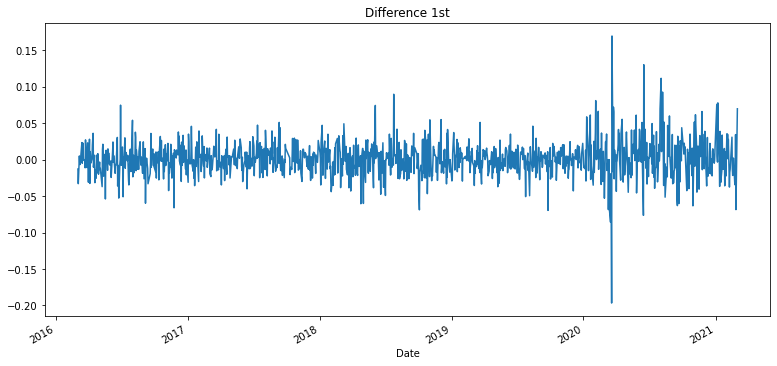

In [41]:
# 차분 안정성 확인 -> d 구하기

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.367127e+01
p-value                        1.458140e-25
#Lags Used                     1.900000e+01
Number of Observations Used    1.204000e+03
Critical Value (1%)           -3.435793e+00
Critical Value (5%)           -2.863944e+00
Critical Value (10%)          -2.568050e+00
dtype: float64


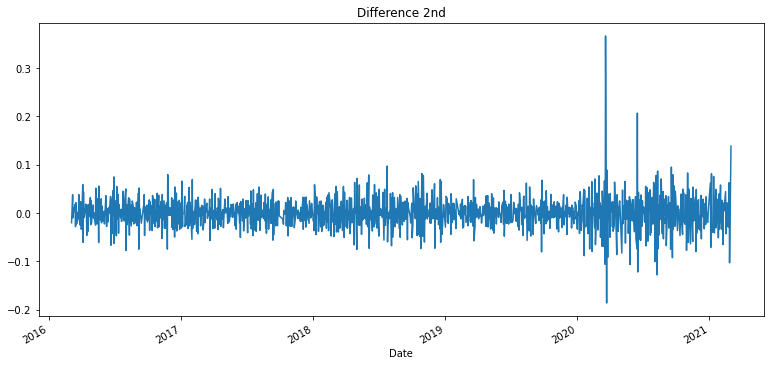

In [42]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')
augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -1.695743e+01
p-value                        9.362827e-30
#Lags Used                     2.300000e+01
Number of Observations Used    1.199000e+03
Critical Value (1%)           -3.435816e+00
Critical Value (5%)           -2.863954e+00
Critical Value (10%)          -2.568055e+00
dtype: float64


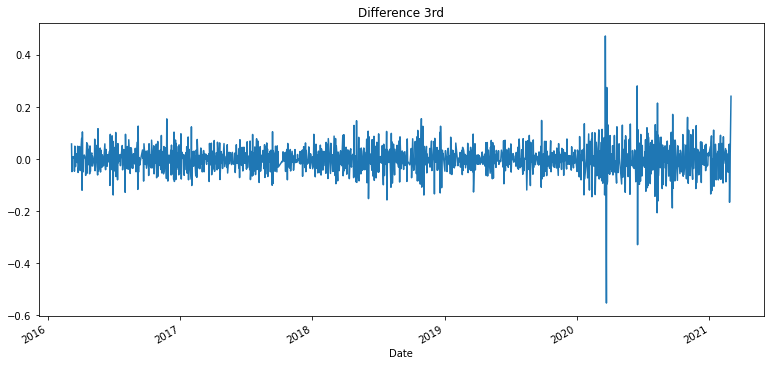

In [43]:
# 혹시 필요한 경우 3차 차분 구하기
diff_3 = diff_2.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 3rd')
augmented_dickey_fuller_test(diff_3)

---
### STEP 6 : ARIMA 모델 훈련과 테스트

In [44]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit()  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1102
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2588.920
Method:                       css-mle   S.D. of innovations              0.023
Date:                Tue, 02 Mar 2021   AIC                          -5171.840
Time:                        18:09:35   BIC                          -5156.826
Sample:                             1   HQIC                         -5166.161
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0008      0.001      1.212      0.226      -0.001       0.002
ar.L1.D.Close    -0.0399      0.030     -1.327      0.185      -0.099       0.019
                                    Root

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provid

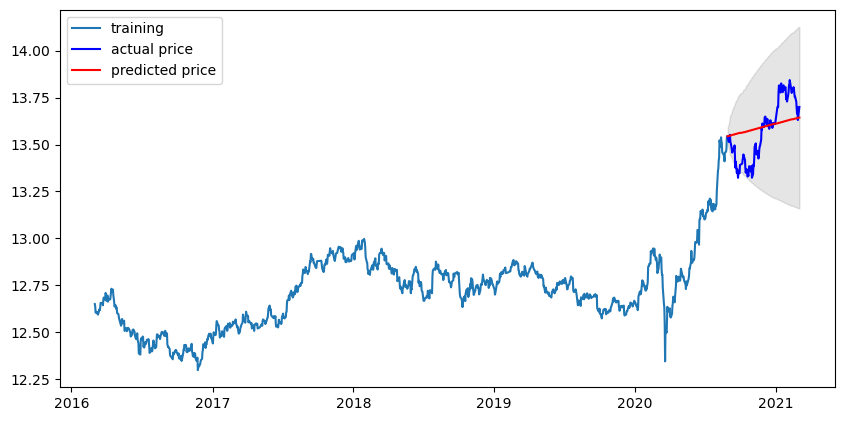

In [45]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  11810093409.066986
MAE:  91048.69852822422
RMSE:  108674.2536623417
MAPE: 11.84%


---
### 네이버

---
### STEP 1 : 시계열 데이터 준비

In [47]:
# 네이버
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/035420.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head(3)

Date
2016-03-02    121800.0
2016-03-03    122000.0
2016-03-04    122600.0
Name: Close, dtype: float64

---
### STEP 2 : 각종 전처리 수행

In [48]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [49]:
# 로그 변환 시도 
ts_log = np.log(ts)

---
### STEP 3 : 시계열 안정성 분석

In [51]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                    0.786010
p-value                           0.991407
#Lags Used                       17.000000
Number of Observations Used    1208.000000
Critical Value (1%)              -3.435775
Critical Value (5%)              -2.863936
Critical Value (10%)             -2.568045
dtype: float64


In [52]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                    0.339801
p-value                           0.979099
#Lags Used                        1.000000
Number of Observations Used    1224.000000
Critical Value (1%)              -3.435704
Critical Value (5%)              -2.863904
Critical Value (10%)             -2.568029
dtype: float64


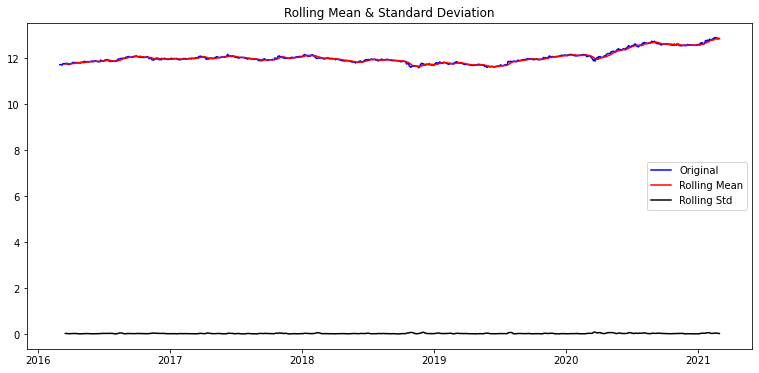

In [54]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

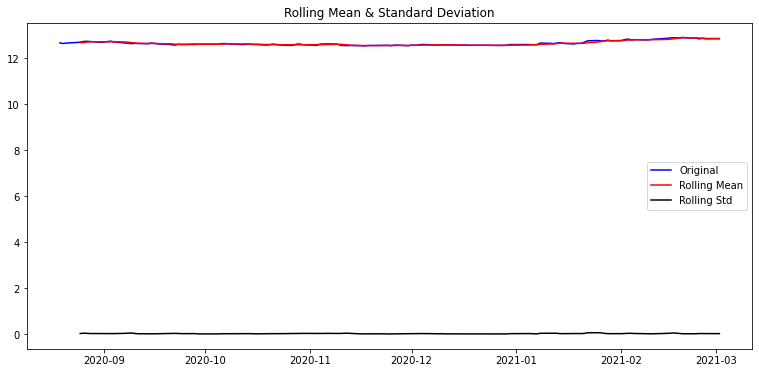

In [55]:
# 6개월 뽑아 보기
plot_rolling_statistics(ts_log[-130:], window=5)

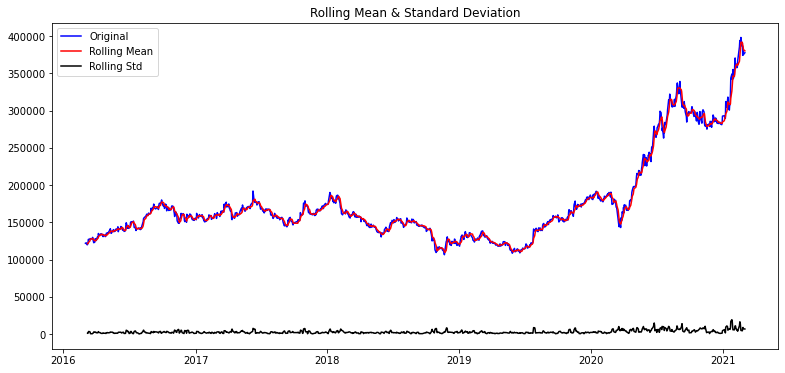

In [56]:
#전체
plot_rolling_statistics(ts, window=5)

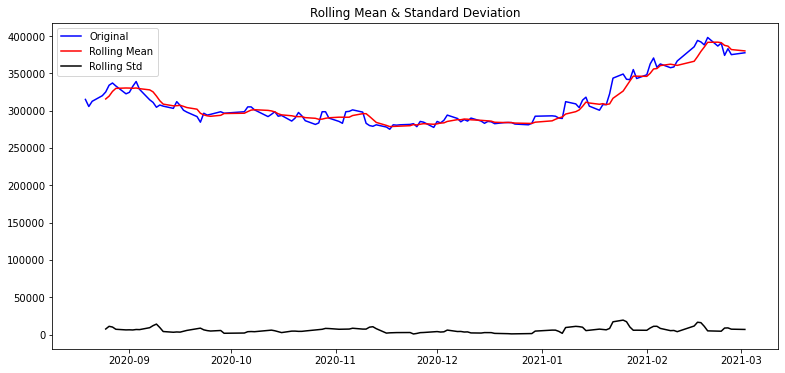

In [57]:
# 6개월 뽑아 보기
plot_rolling_statistics(ts[-130:], window=5)

In [58]:
#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='additive', period = 25) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.044521e+01
p-value                        1.486247e-18
#Lags Used                     1.700000e+01
Number of Observations Used    1.184000e+03
Critical Value (1%)           -3.435885e+00
Critical Value (5%)           -2.863984e+00
Critical Value (10%)          -2.568071e+00
dtype: float64


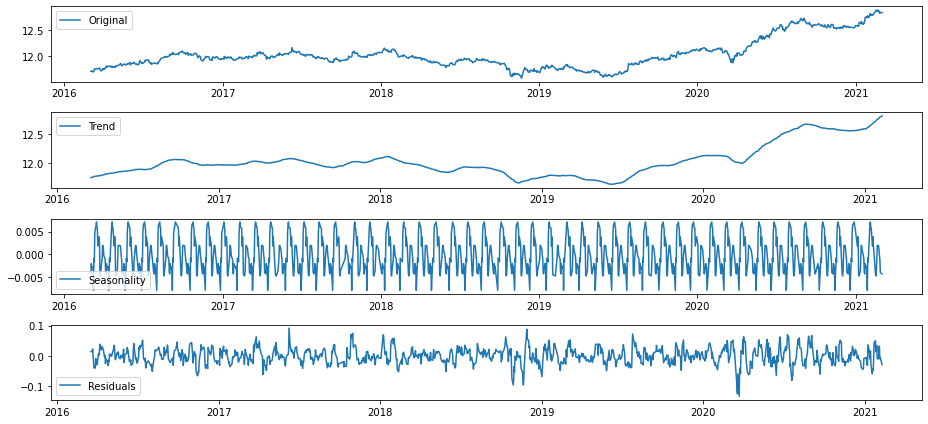

In [59]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [60]:
#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='additive', period = 26) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.033057e+01
p-value                        2.849670e-18
#Lags Used                     1.700000e+01
Number of Observations Used    1.182000e+03
Critical Value (1%)           -3.435894e+00
Critical Value (5%)           -2.863988e+00
Critical Value (10%)          -2.568074e+00
dtype: float64


In [61]:
#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='additive', period = 27) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.023412e+01
p-value                        4.940307e-18
#Lags Used                     1.700000e+01
Number of Observations Used    1.182000e+03
Critical Value (1%)           -3.435894e+00
Critical Value (5%)           -2.863988e+00
Critical Value (10%)          -2.568074e+00
dtype: float64


In [63]:
#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='additive', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -9.988014e+00
p-value                        2.031018e-17
#Lags Used                     1.700000e+01
Number of Observations Used    1.178000e+03
Critical Value (1%)           -3.435913e+00
Critical Value (5%)           -2.863997e+00
Critical Value (10%)          -2.568078e+00
dtype: float64


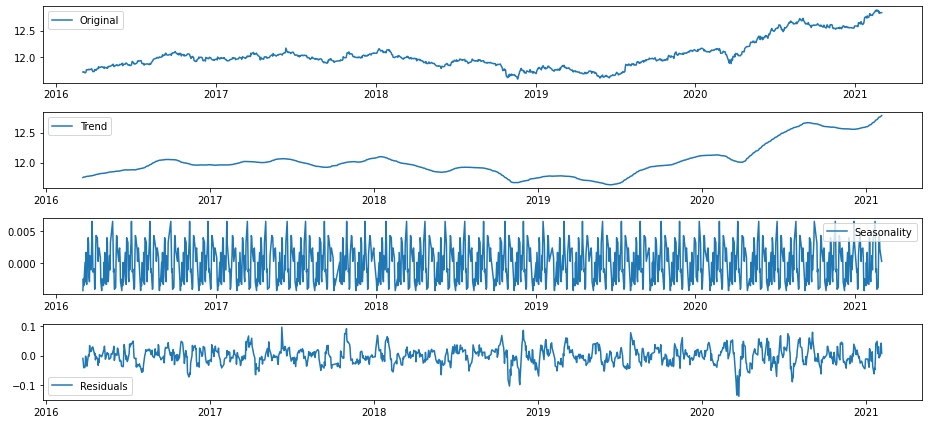

In [64]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

---
### STEP 4 : 학습, 테스트 데이터셋 생성

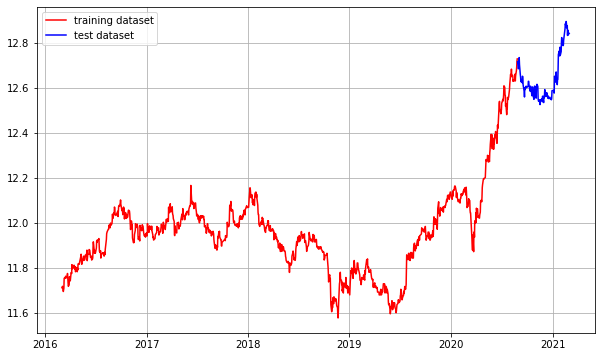

In [65]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

---
### STEP 5 : 적정 ARIMA 모수 찾기

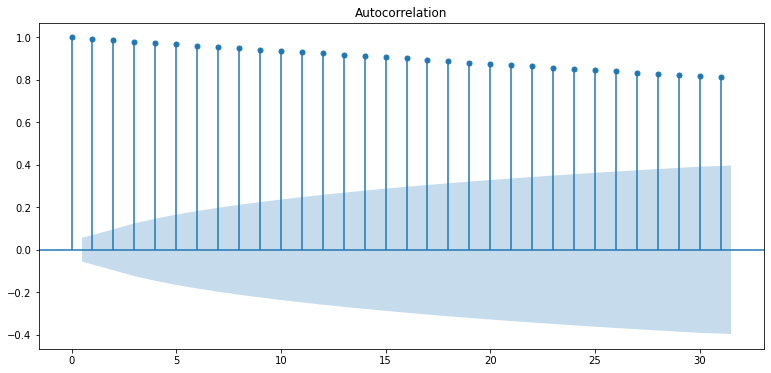

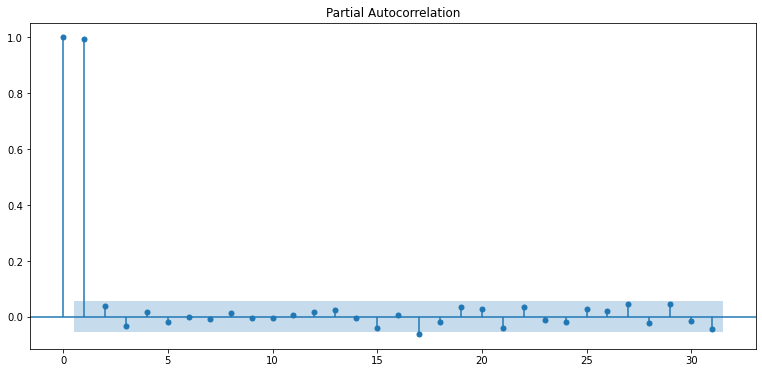

In [66]:
# ACF, PACF 그려보기 -> p,q  구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -37.881692
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1224.000000
Critical Value (1%)              -3.435704
Critical Value (5%)              -2.863904
Critical Value (10%)             -2.568029
dtype: float64


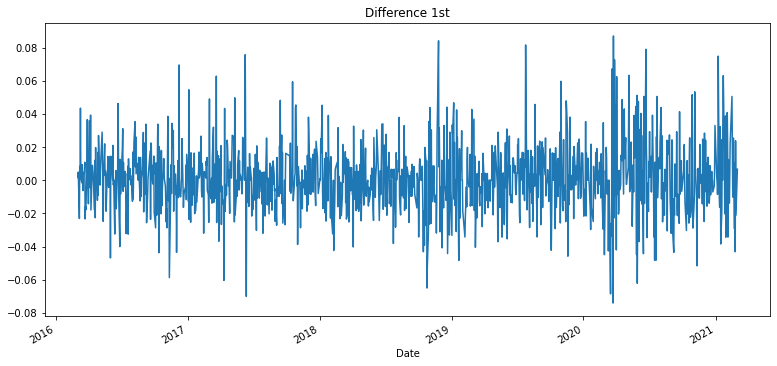

In [67]:
# 차분 안정성 확인 -> d 구하기

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.211684e+01
p-value                        1.863999e-22
#Lags Used                     2.300000e+01
Number of Observations Used    1.200000e+03
Critical Value (1%)           -3.435811e+00
Critical Value (5%)           -2.863952e+00
Critical Value (10%)          -2.568054e+00
dtype: float64


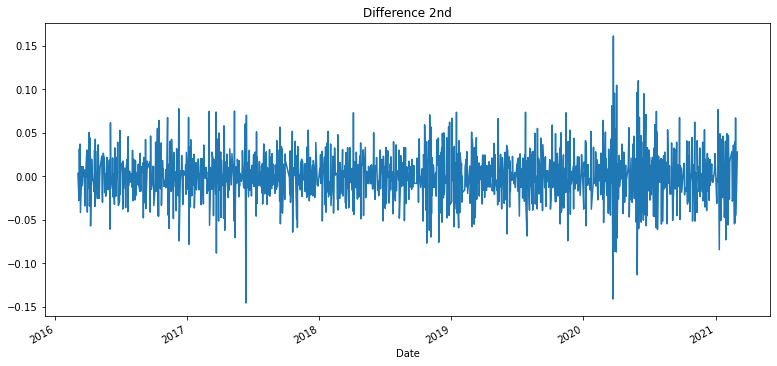

In [68]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')
augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -1.615416e+01
p-value                        4.536609e-29
#Lags Used                     2.300000e+01
Number of Observations Used    1.199000e+03
Critical Value (1%)           -3.435816e+00
Critical Value (5%)           -2.863954e+00
Critical Value (10%)          -2.568055e+00
dtype: float64


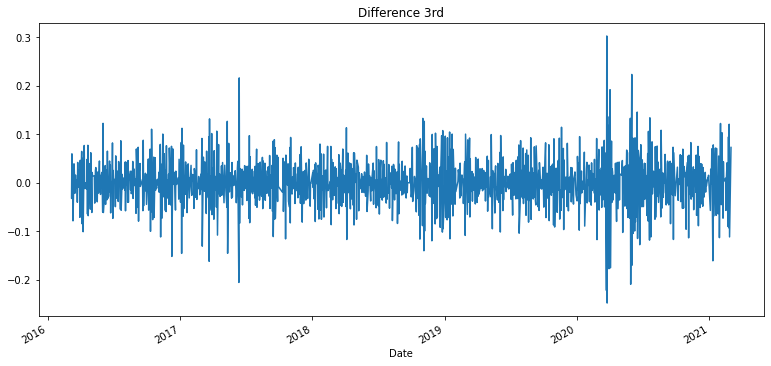

In [69]:
# 혹시 필요한 경우 3차 차분 구하기
diff_3 = diff_2.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 3rd')
augmented_dickey_fuller_test(diff_3)

---
### STEP 6 : ARIMA 모델 훈련과 테스트

In [98]:
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit()  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1102
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2743.664
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 02 Mar 2021   AIC                          -5481.328
Time:                        18:13:07   BIC                          -5466.314
Sample:                             1   HQIC                         -5475.649
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.001      1.667      0.095      -0.000       0.002
ar.L1.D.Close    -0.0924      0.030     -3.081      0.002      -0.151      -0.034
                                    Root

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provid

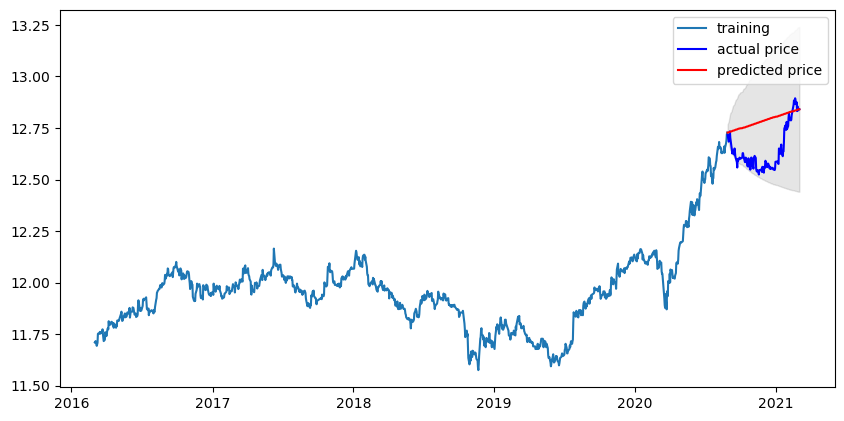

In [99]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')c
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2974214864.335291
MAE:  48709.52803162686
RMSE:  54536.362771414184
MAPE: 16.55%


In [108]:
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(trend='nc')  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1102
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2742.279
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 02 Mar 2021   AIC                          -5480.557
Time:                        18:15:14   BIC                          -5470.547
Sample:                             1   HQIC                         -5476.771
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.Close    -0.0901      0.030     -3.005      0.003      -0.149      -0.031
                                    Roots                                    
                  Real          Imaginary   

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provid

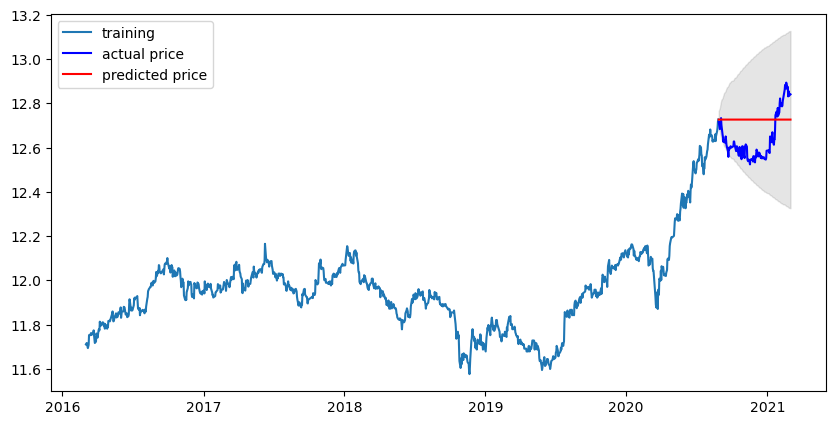

In [109]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [110]:


mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1790243921.4998722
MAE:  39518.6894567817
RMSE:  42311.274165402676
MAPE: 13.10%


---
### 현대차

---
### STEP 1 : 시계열 데이터 준비

In [111]:
# 네이버
dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005380.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head(3)

Date
2016-03-02    150000.0
2016-03-03    147500.0
2016-03-04    147500.0
Name: Close, dtype: float64

---
### STEP 2 : 각종 전처리 수행

In [112]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [113]:
# 로그 변환 시도 
ts_log = np.log(ts)

---
### STEP 3 : 시계열 안정성 분석

In [114]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                   -0.632234
p-value                           0.863531
#Lags Used                       23.000000
Number of Observations Used    1202.000000
Critical Value (1%)              -3.435802
Critical Value (5%)              -2.863948
Critical Value (10%)             -2.568052
dtype: float64


In [115]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -1.254389
p-value                           0.649773
#Lags Used                        1.000000
Number of Observations Used    1224.000000
Critical Value (1%)              -3.435704
Critical Value (5%)              -2.863904
Critical Value (10%)             -2.568029
dtype: float64


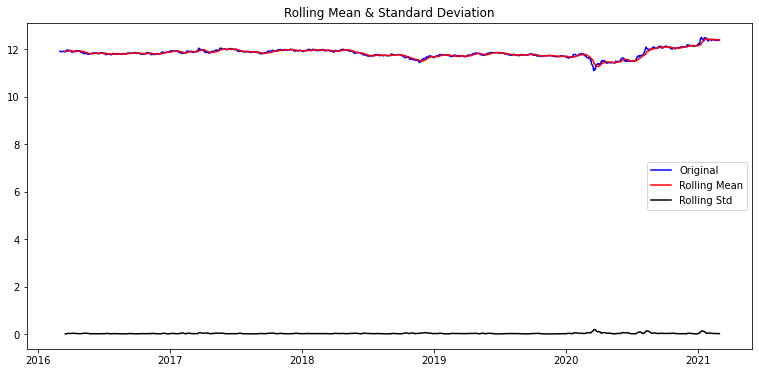

In [116]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

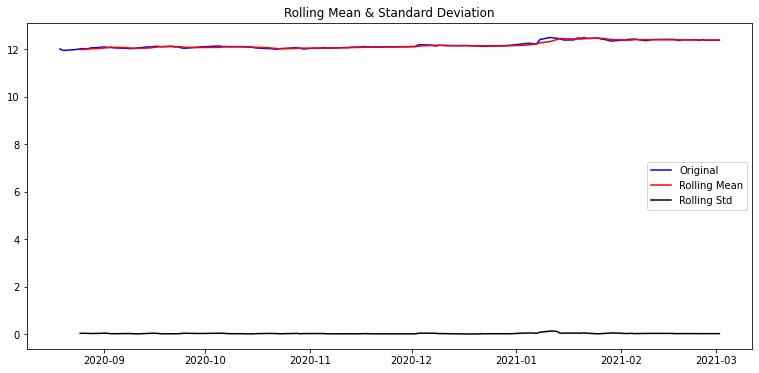

In [117]:
# 6개월 뽑아 보기
plot_rolling_statistics(ts_log[-130:], window=5)

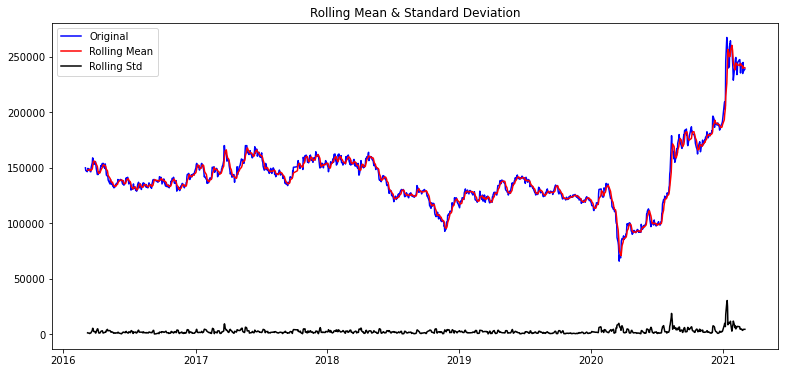

In [118]:
#전체
plot_rolling_statistics(ts, window=5)

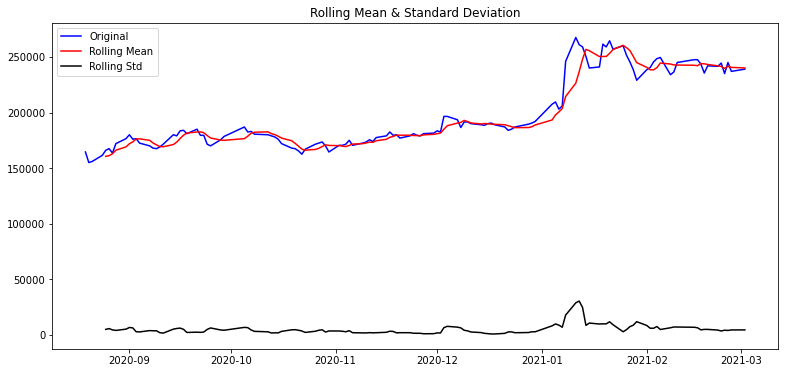

In [119]:
# 6개월 뽑아 보기
plot_rolling_statistics(ts[-130:], window=5)

In [120]:
#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='additive', period = 25) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.169307e+01
p-value                        1.635065e-21
#Lags Used                     1.800000e+01
Number of Observations Used    1.183000e+03
Critical Value (1%)           -3.435890e+00
Critical Value (5%)           -2.863986e+00
Critical Value (10%)          -2.568072e+00
dtype: float64


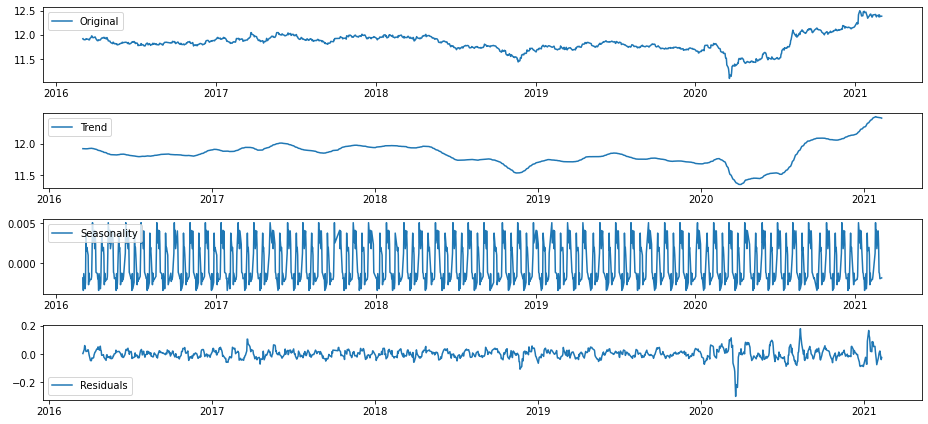

In [121]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [122]:
#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='additive', period = 26) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.163033e+01
p-value                        2.270715e-21
#Lags Used                     1.800000e+01
Number of Observations Used    1.181000e+03
Critical Value (1%)           -3.435899e+00
Critical Value (5%)           -2.863990e+00
Critical Value (10%)          -2.568075e+00
dtype: float64


In [123]:
#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='additive', period = 27) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.138818e+01
p-value                        8.191162e-21
#Lags Used                     1.800000e+01
Number of Observations Used    1.181000e+03
Critical Value (1%)           -3.435899e+00
Critical Value (5%)           -2.863990e+00
Critical Value (10%)          -2.568075e+00
dtype: float64


In [124]:
#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='additive', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Residaul 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.077993e+01
p-value                        2.268796e-19
#Lags Used                     1.800000e+01
Number of Observations Used    1.177000e+03
Critical Value (1%)           -3.435918e+00
Critical Value (5%)           -2.863999e+00
Critical Value (10%)          -2.568079e+00
dtype: float64


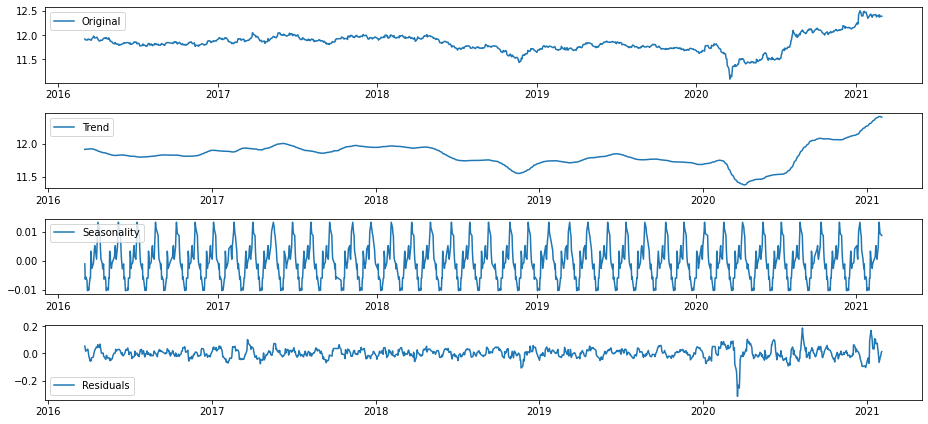

In [125]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

---
### STEP 4 : 학습, 테스트 데이터셋 생성

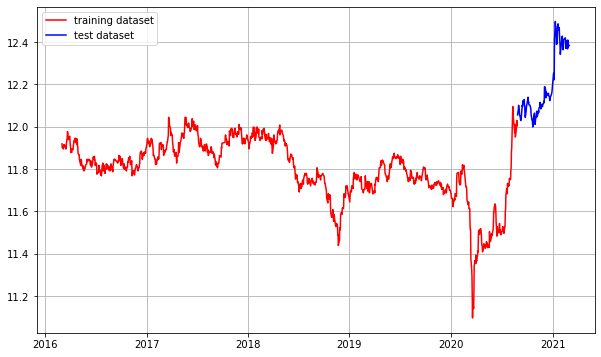

In [126]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data, c='r', label='training dataset') 
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

---
### STEP 5 : 적정 ARIMA 모수 찾기

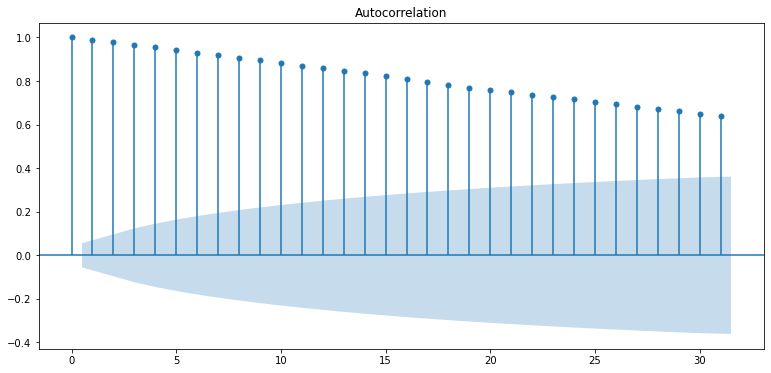

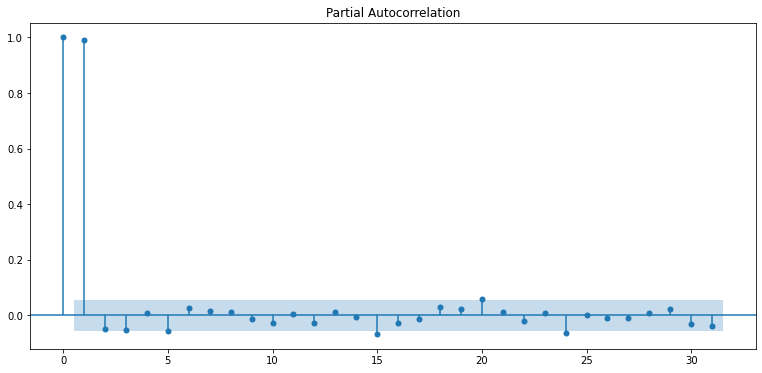

In [127]:
# ACF, PACF 그려보기 -> p,q  구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -32.573781
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1224.000000
Critical Value (1%)              -3.435704
Critical Value (5%)              -2.863904
Critical Value (10%)             -2.568029
dtype: float64


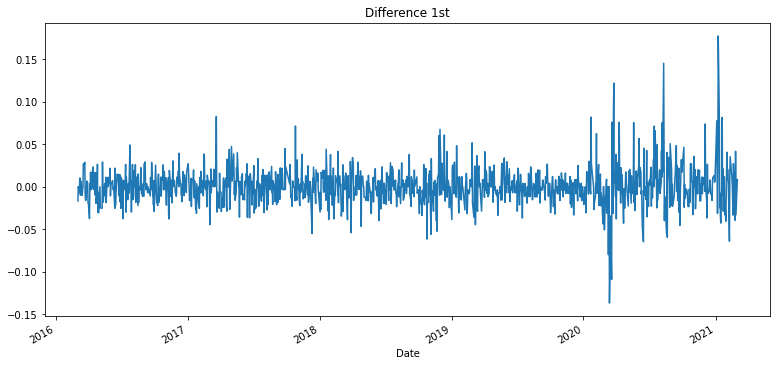

In [128]:
# 차분 안정성 확인 -> d 구하기

# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.214561e+01
p-value                        1.613437e-22
#Lags Used                     2.200000e+01
Number of Observations Used    1.201000e+03
Critical Value (1%)           -3.435807e+00
Critical Value (5%)           -2.863950e+00
Critical Value (10%)          -2.568053e+00
dtype: float64


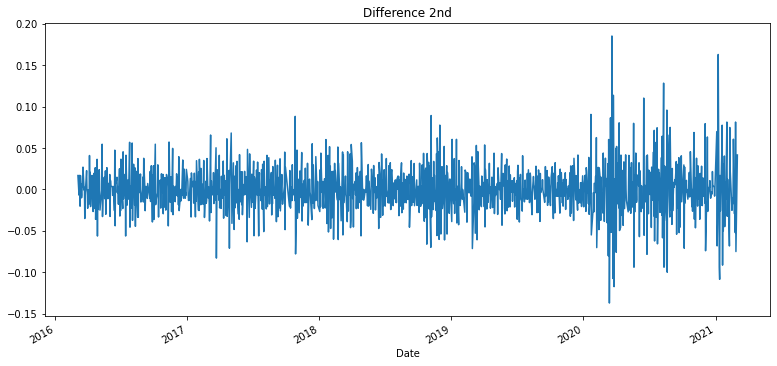

In [129]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')
augmented_dickey_fuller_test(diff_2)

Results of Dickey-Fuller Test:
Test Statistic                -1.457930e+01
p-value                        4.495463e-27
#Lags Used                     2.300000e+01
Number of Observations Used    1.199000e+03
Critical Value (1%)           -3.435816e+00
Critical Value (5%)           -2.863954e+00
Critical Value (10%)          -2.568055e+00
dtype: float64


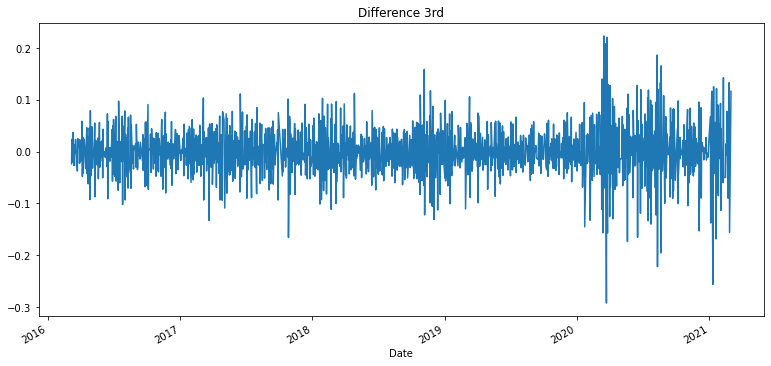

In [130]:
# 혹시 필요한 경우 3차 차분 구하기
diff_3 = diff_2.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 3rd')
augmented_dickey_fuller_test(diff_3)

---
### STEP 6 : ARIMA 모델 훈련과 테스트

In [131]:
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit()  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1102
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2696.570
Method:                       css-mle   S.D. of innovations              0.021
Date:                Tue, 02 Mar 2021   AIC                          -5387.140
Time:                        18:17:35   BIC                          -5372.126
Sample:                             1   HQIC                         -5381.461
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.579e-05      0.001      0.113      0.910      -0.001       0.001
ar.L1.D.Close     0.0605      0.030      2.013      0.044       0.002       0.120
                                    Root

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provid

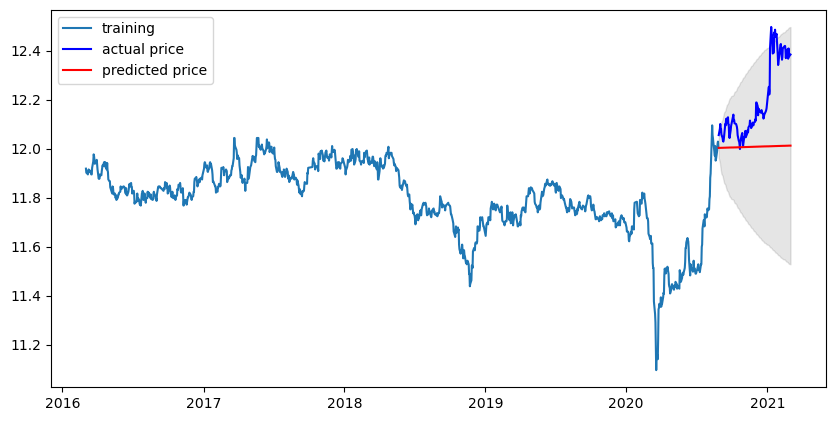

In [133]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2191805789.7432504
MAE:  35065.98609570516
RMSE:  46816.72553418543
MAPE: 15.78%


In [135]:
# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(trend='nc')  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1102
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2696.564
Method:                       css-mle   S.D. of innovations              0.021
Date:                Tue, 02 Mar 2021   AIC                          -5389.128
Time:                        18:17:42   BIC                          -5379.118
Sample:                             1   HQIC                         -5385.341
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.Close     0.0606      0.030      2.013      0.044       0.002       0.120
                                    Roots                                    
                  Real          Imaginary   

/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/ssac7/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provid

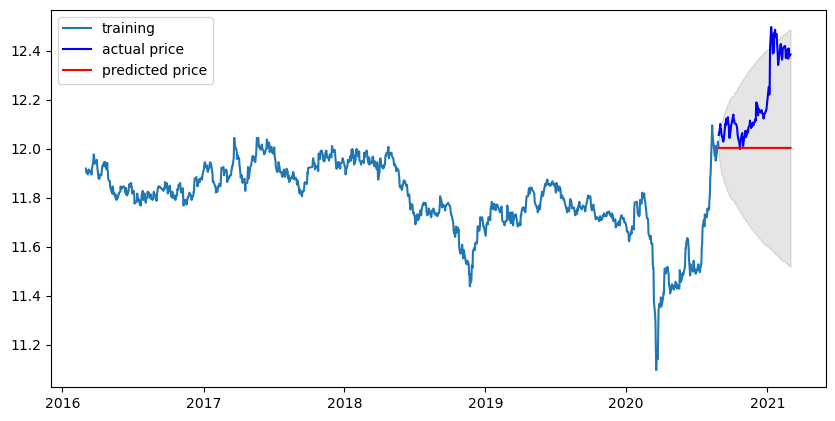

In [136]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [137]:


mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2269171092.91476
MAE:  35827.520952254104
RMSE:  47635.81733228433
MAPE: 16.14%
